# Proyek Analisis Data: data
- Nama: Dzulfikri Adjmal
- Email: dzulfikriadjmal@gmail.com
- Id Dicoding: dzulfikriadjmal

## Menentukan Pertanyaan Bisnis

- Bagaimana demografi geolokasi pelanggan e-commerce ini?
- Apa saja kategori produk yang paling populer di e-commerce ini?
- Bagaimana rating rata-rata pelayanan pelanggan terhadap pelayanan yang disediakan e-commerce dalam rentang bulan tertentu?

## Menyiapkan semua library yang dibuthkan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

## Data Wrangling

### Gathering Data

- load data customer

In [2]:
customer_df = pd.read_csv('./data/customers_dataset.csv')
customer_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


- load data geolocation

In [3]:
geolocation_df = pd.read_csv('./data/geolocation_dataset.csv')
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


- load data order items

In [4]:
order_items_df = pd.read_csv('./data/order_items_dataset.csv')
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


- load data payment

In [5]:
order_payment_df = pd.read_csv('./data/order_payments_dataset.csv')
order_payment_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


- load data review

In [6]:
order_reviews_df = pd.read_csv('./data/order_reviews_dataset.csv')
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


- load data order

In [7]:
orders_df = pd.read_csv('./data/orders_dataset.csv')
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


- load data product name translation

In [8]:
product_name_translation_df = pd.read_csv('./data/product_category_name_translation.csv')
product_name_translation_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


- load data product

In [9]:
products_df = pd.read_csv('./data/products_dataset.csv')
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


- load data seller

In [10]:
sellers_df = pd.read_csv('./data/sellers_dataset.csv')
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Assessing Data

- Data customer_df

In [11]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


pengecekan duplikat data pada dataset customer

In [12]:
print("Jumlah duplikasi: ", customer_df.duplicated().sum())
customer_df.describe()

Jumlah duplikasi:  0


,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


- Data geolocation_df

In [13]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


Pengecekan duplikat data pada dataset geolocation

In [14]:
print("Jumlah duplikasi: ", geolocation_df.duplicated().sum())
geolocation_df.describe()

Jumlah duplikasi:  261831


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


Terdapat 261831 duplikat pada dataset. Maka diambil tindakan unuk melakukan penghapusan pada data yang duplikat

- Data order_items_df

In [15]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


Dari informasi ringkasan dataset, terdapat ketidaksesuaian tipe data pada kolom `shipping_limit_date`. tipe data kolom tersebut seharusnya bertipe datetime.

Melakukan pengecekan duplikat pada dataset order item

In [16]:
print("Jumlah duplikat : ", order_items_df.duplicated().sum())
order_items_df.describe()

Jumlah duplikat :  0


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


- Data order_payment_df

In [17]:
order_payment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


Melakukan pengecekan data duplikat pada dataset order payment

In [18]:
print("Jumlah duplikat : ",order_payment_df.duplicated().sum())
order_payment_df.describe()

Jumlah duplikat :  0


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


- Data order_reviews_df

In [19]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


Saat menampilkan ringkasan informasi tentang dataset order review, terdapat perbedaan jumlah **Non-Null** dengan **entries** pada kolom `review_comment_title` dan `review_comment_message`. Hal tersebut menandakan terdapat _missing value_ pada kolom tersebut. Kemudian terdapat ketidaksesuaian tipe data pada kolom `review_creation_date` dan `review_answer_timestamp` yang harusnya bertipe datetime. Selanjutnya adalah melakukan pengecekan jumlah data yang _missing_ tersebut.

In [20]:
order_reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

Ditemukan `87656` data yang missing pada kolom `review_comment_title` dan `58247` data yang missing pada kolom `review_comment_message`. Kemudian melakukan pengecekan apakah terdapat data yang duplikat. 

In [21]:
print("Jumlah duplikat : ", order_reviews_df.duplicated().sum())
order_reviews_df.describe()

Jumlah duplikat :  0


,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


- Data orders_df

In [22]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


Saat menampilkan ringkasan informasi tentang dataset order, terdapat perbedaan jumlah **Non-Null** dengan **entries** pada kolom `order_approved_at`, `order_delivered_carrier_date`, dan `order_delivered_customer_date`. Lalu terdapat ketidaksesuaian tipe data pada kolom `order_purchase_timestamp`, `order_approved_at`, `order_delivered_carrier_date`, `order_delivered_customer_date`, dan `order_estimated_delivery_date` yang seharusnya bertipe datetime. Hal tersebut menandakan terdapat _missing value_ pada kolom tersebut. Selanjutnya adalah melakukan pengecekan jumlah data yang _missing_ tersebut.

In [23]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Ditemukan 160 missing value pada kolom `order_approved_at`, 1783 pada kolom `order_delivered_carrier_date`, dan 2965 pada `order_delivered_customer_date`. Kemudian melakukan pengecekan duplikat data.

In [24]:
print("Jumlah duplikat : ", orders_df.duplicated().sum())
orders_df.describe()

Jumlah duplikat :  0


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


- Data product_name_translation_df

In [25]:
product_name_translation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


Melakukan pengecekan duplikat data pada dataset product name translation.

In [26]:
print("Jumlah duplikat : ", product_name_translation_df.duplicated().sum())

Jumlah duplikat :  0


- Data products_df

In [27]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


Dari ringkasan informasi terdapat perbedaan jumlah `entries` dengan `non-null`. Kemudian melakukan perhitungan jumlah data yang missing value.

In [28]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

Terdapat 610 data yang missing pada kolom product_category_name, product_name_lenght, product_description_length, dan product_photos_qty dam 2 data yang missing pada product_weight_g, product_length_cm, product_height_cm, dan product_width_cm. Kemudian melakukan pengecekan duplikat data.

In [29]:
print("Jumlah duplikat : ", products_df.duplicated().sum())
products_df.describe()

Jumlah duplikat :  0


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [30]:
product_name =  {}
for index, row in product_name_translation_df.iterrows():
    product_name[row['product_category_name']] = row['product_category_name_english']

products_df['product_category_name'].replace(product_name,inplace=True)
products_df

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,baby,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,furniture_decor,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construction_tools_lights,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,bed_bath_table,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,computers_accessories,60.0,156.0,2.0,700.0,31.0,13.0,20.0


- Data sellers_df

In [31]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


Melakukan pengecekan duplikat data pada dataset sellers

In [32]:
print("Jumlah duplikat : ", sellers_df.duplicated().sum())
sellers_df.describe()

Jumlah duplikat :  0


,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


### Cleaning Data

- Mengubah nama state pada customers_df menjadi nama lengkap

In [33]:
name_of_state = {
    "AC": "Acre",
"AL" : "Alagoas",
"AM" : "Amazonas",
"AP" : "Amapá",
"BA" : "Bahia",
"CE" : "Ceará",
"DF" : "Distrito Federal",
"ES" : "Espírito Santo",
"GO" : "Goiás",
"MA" : "Maranhão",
"MG" : "Minas Gerais",
"MS" : "Mato Grosso do Sul",
"MT" : "Mato Grosso",
"PA" : "Pará",
"PB" : "Paraíba",
"PE" : "Pernambuco",
"PI" : "Piauí",
"PR" : "Paraná",
"RJ" : "Rio de Janeiro",
"RN" : "Rio Grande do Norte",
"RO" : "Rondônia",
"RR" : "Roraima",
"RS" : "Rio Grande do Sul",
"SC" : "Santa Catarina",
"SE" : "Sergipe",
"SP" : "São Paulo",
"TO" : "Tocantins",
}
customer_df['customer_state'].replace(name_of_state,inplace=True)
customer_df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,São Paulo
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,São Paulo
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,São Paulo
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,São Paulo
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,São Paulo
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,São Paulo
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,São Paulo
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,Ceará
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,Rio Grande do Sul


- Cleaning geolocation_df

Menghapus data yang duplikat

In [34]:
geolocation_df.drop_duplicates(inplace=True)
print("Jumlah duplikat : ", geolocation_df.duplicated().sum())

Jumlah duplikat :  0


In [35]:
geolocation_df['geolocation_state'].replace(name_of_state,inplace=True)
geolocation_df

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,São Paulo
1,1046,-23.546081,-46.644820,sao paulo,São Paulo
2,1046,-23.546129,-46.642951,sao paulo,São Paulo
3,1041,-23.544392,-46.639499,sao paulo,São Paulo
4,1035,-23.541578,-46.641607,sao paulo,São Paulo
...,...,...,...,...,...
1000155,99965,-28.180655,-52.034367,agua santa,Rio Grande do Sul
1000156,99950,-28.072188,-52.011272,tapejara,Rio Grande do Sul
1000157,99950,-28.068864,-52.012964,tapejara,Rio Grande do Sul
1000158,99950,-28.068639,-52.010705,tapejara,Rio Grande do Sul


- Cleaning order_item_df

Mengubah tipe data pada kolom `shipping_limit_date` menjadi datetime

In [36]:
order_items_df['shipping_limit_date'] = pd.to_datetime(order_items_df['shipping_limit_date'])
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


- Cleaning order_reviews_df

Melihat data yang missing value

In [37]:
order_reviews_df[order_reviews_df['review_comment_title'].isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


Melihat data yang missing value

In [38]:
order_reviews_df[order_reviews_df['review_comment_message'].isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,NaN,NaN,2018-04-13 00:00:00,2018-04-16 00:39:37
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,NaN,NaN,2017-07-16 00:00:00,2017-07-18 19:30:34
...,...,...,...,...,...,...,...
99217,c6b270c61f67c9f7cb07d84ea8aeaf8b,48f7ee67313eda32bfcf5b9c1dd9522d,5,NaN,NaN,2017-12-13 00:00:00,2017-12-14 11:09:36
99218,af2dc0519de6e0720ef0c74292fb4114,d699c734a0b1c8111f2272a3f36d398c,5,NaN,NaN,2018-04-27 00:00:00,2018-04-30 01:18:57
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42


Mengisi data yang missing, untuk kolom `review_comment_title` diisi dengan `Tidak ada judul` dan kolom `review_comment_message` diisi dengan `Tidak ada komentar`.

In [39]:
order_reviews_df['review_comment_title'].fillna(value="Tidak ada judul", inplace=True)
order_reviews_df['review_comment_message'].fillna(value="Tidak ada komentar", inplace=True)

Mengecek jumlah data yang missing

In [40]:
order_reviews_df.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

Melihat 5 baris data teratas

In [41]:
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,Tidak ada judul,Tidak ada komentar,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,Tidak ada judul,Tidak ada komentar,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,Tidak ada judul,Tidak ada komentar,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,Tidak ada judul,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,Tidak ada judul,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


Mengubah tipe data kolom `review_creation_date` dan `review_answer_timestamp` menjadi datetime.

In [42]:
to_datetime_columns = order_reviews_df[['review_creation_date', 'review_answer_timestamp']]

for column in to_datetime_columns:
    order_reviews_df[column] = pd.to_datetime(order_reviews_df[column])
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     99224 non-null  object        
 4   review_comment_message   99224 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


Melihat 5 data teratas pada dataframe order_reviews

In [43]:
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,Tidak ada judul,Tidak ada komentar,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,Tidak ada judul,Tidak ada komentar,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,Tidak ada judul,Tidak ada komentar,2018-02-17,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,Tidak ada judul,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,Tidak ada judul,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53


- Cleaning orders_df

In [44]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


Melihat data yang missing value

In [45]:
orders_df[orders_df['order_delivered_customer_date'].isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaN,2018-06-28 00:00:00
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaN,NaN,2018-08-21 00:00:00
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaN,NaN,2017-10-03 00:00:00
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaN,2018-02-07 00:00:00
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaN,NaN,2018-02-06 00:00:00
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaN,NaN,NaN,2018-09-27 00:00:00
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaN,NaN,2017-09-15 00:00:00


Menghapus data yang missing value

In [46]:
orders_df.dropna(inplace=True)
orders_df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

Mengubah kolom yang berkaitan dengan waktu menjadi bertipe datetime.

In [47]:
orders_columns_to_date = ['order_purchase_timestamp', 
                          'order_approved_at', 
                          'order_delivered_carrier_date', 
                          'order_delivered_customer_date', 
                          'order_estimated_delivery_date']

for column in orders_columns_to_date:
    orders_df[column] = pd.to_datetime(orders_df[column])
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96461 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96461 non-null  object        
 1   customer_id                    96461 non-null  object        
 2   order_status                   96461 non-null  object        
 3   order_purchase_timestamp       96461 non-null  datetime64[ns]
 4   order_approved_at              96461 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96461 non-null  datetime64[ns]
 6   order_delivered_customer_date  96461 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96461 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.6+ MB


- Cleaning products_df

Melihat jumlah data yang missing

In [48]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

melihat data yang memiliki missing value

In [49]:
products_df[products_df['product_category_name'].isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


Melihat jumlah kategori produk yang paling banyak

In [50]:
products_df['product_category_name'].value_counts()

product_category_name
bed_bath_table               3029
sports_leisure               2867
furniture_decor              2657
health_beauty                2444
housewares                   2335
                             ... 
fashion_childrens_clothes       5
home_comfort_2                  5
pc_gamer                        3
security_and_services           2
cds_dvds_musicals               1
Name: count, Length: 73, dtype: int64

Mengisi missing value pada kolom product_category_name dengan produk yang paling banyak dibeli

In [51]:
products_df['product_category_name'].fillna(value='cama_mesa_banho', inplace=True)

Mengisi kolom yang missing value dan bertipe float dengan nilai rata-rata

In [52]:
column_to_impute = products_df.select_dtypes(exclude='object').columns.tolist()
for column in column_to_impute:
    column_avg = round(products_df[column].mean(),1)
    products_df[column].fillna(value=column_avg, inplace=True)
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32951 non-null  object 
 2   product_name_lenght         32951 non-null  float64
 3   product_description_lenght  32951 non-null  float64
 4   product_photos_qty          32951 non-null  float64
 5   product_weight_g            32951 non-null  float64
 6   product_length_cm           32951 non-null  float64
 7   product_height_cm           32951 non-null  float64
 8   product_width_cm            32951 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [53]:
products_df.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

In [54]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000
mean,48.477375,771.495372,2.189190,2276.472489,30.815077,16.937659,23.196728
std,10.150459,629.208849,1.720615,4281.908773,16.913945,13.637140,12.078681
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,344.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,604.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,961.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


Menggabungkan data yang sudah dibersihkan

In [55]:
merged_df1 = pd.merge(order_items_df, orders_df, on='order_id', how='inner')
merged_df1

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110175,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-23 13:57:06,2018-04-25 04:11:01,2018-04-25 12:09:00,2018-05-10 22:56:40,2018-05-18
110176,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,84c5d4fbaf120aae381fad077416eaa0,delivered,2018-07-14 10:26:46,2018-07-17 04:31:48,2018-07-17 08:05:00,2018-07-23 20:31:55,2018-08-01
110177,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,2017-10-24 17:14:25,2017-10-26 15:13:14,2017-10-28 12:22:22,2017-11-10
110178,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,b5e6afd5a41800fdf401e0272ca74655,delivered,2017-08-14 23:02:59,2017-08-15 00:04:32,2017-08-15 19:02:53,2017-08-16 21:59:40,2017-08-25


Menghapus kolom yang tidak diperlukan

In [56]:
merged_df2 = pd.merge(merged_df1, products_df, on='product_id', how='inner')
merged_df2.drop(merged_df2.columns[15:22], inplace=True, axis=1)
merged_df2.drop(merged_df2.columns[10:14], inplace=True, axis=1)
merged_df2


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,product_category_name
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,cool_stuff
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,e6eecc5a77de221464d1c4eaff0a9b64,delivered,2017-06-28 11:52:20,cool_stuff
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,4ef55bf80f711b372afebcb7c715344a,delivered,2018-05-18 10:25:53,cool_stuff
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,30407a72ad8b3f4df4d15369126b20c9,delivered,2017-08-01 18:38:42,cool_stuff
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,91a792fef70ecd8cc69d3c7feb3d12da,delivered,2017-08-10 21:48:40,cool_stuff
...,...,...,...,...,...,...,...,...,...,...,...
110175,ffebd80e3291e811c308365936897efd,1,4cc4d02efc8f249c13355147fb44e34d,d1c7fa84e48cfa21a0e595167c1c500e,2018-07-18 20:23:55,129.9,51.20,050309b91cc5e04e68841938e7984aaf,delivered,2018-07-13 20:04:05,garden_tools
110176,ffee31fb4b5e35c9123608015637c495,1,b10ecf8e33aaaea419a9fa860ea80fb5,0241d4d5d36f10f80c644447315af0bd,2018-08-21 10:10:11,99.0,13.52,11e0f43ab4e2d2c48348dd9332c0ef80,delivered,2018-08-18 10:00:59,furniture_decor
110177,fff7c4452f050315db1b3f24d9df5fcd,1,dd469c03ad67e201bc2179ef077dcd48,7e93a43ef30c4f03f38b393420bc753a,2017-06-07 17:05:23,736.0,20.91,dec8952e97ef6124259c56914fb3569c,delivered,2017-06-01 16:53:03,watches_gifts
110178,fffa82886406ccf10c7b4e35c4ff2788,1,bbe7651fef80287a816ead73f065fc4b,8f2ce03f928b567e3d56181ae20ae952,2017-12-22 17:31:42,229.9,44.02,a5201e1a6d71a8d21e869151bd5b4085,delivered,2017-12-18 16:33:07,sports_leisure


Menggabungkan dengan data customer

In [57]:
merged_df3 = pd.merge(merged_df2, customer_df, on='customer_id', how='inner')
merged_df3.drop(labels=['customer_id', 'customer_zip_code_prefix'], axis=1, inplace=True)
merged_df3

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,order_status,order_purchase_timestamp,product_category_name,customer_unique_id,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,delivered,2017-09-13 08:59:02,cool_stuff,871766c5855e863f6eccc05f988b23cb,campos dos goytacazes,Rio de Janeiro
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,delivered,2017-06-28 11:52:20,cool_stuff,0fb8e3eab2d3e79d92bb3fffbb97f188,jatai,Goiás
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,delivered,2018-05-18 10:25:53,cool_stuff,3419052c8c6b45daf79c1e426f9e9bcb,belo horizonte,Minas Gerais
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,delivered,2017-08-01 18:38:42,cool_stuff,e7c828d22c0682c1565252deefbe334d,sao jose dos pinhais,Paraná
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,delivered,2017-08-10 21:48:40,cool_stuff,0bb98ba72dcc08e95f9d8cc434e9a2cc,conselheiro lafaiete,Minas Gerais
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110175,ffebd80e3291e811c308365936897efd,1,4cc4d02efc8f249c13355147fb44e34d,d1c7fa84e48cfa21a0e595167c1c500e,2018-07-18 20:23:55,129.9,51.20,delivered,2018-07-13 20:04:05,garden_tools,a1c2e4b4c1b29e41684ebdf3cc6538f8,conceicao de macabu,Rio de Janeiro
110176,ffee31fb4b5e35c9123608015637c495,1,b10ecf8e33aaaea419a9fa860ea80fb5,0241d4d5d36f10f80c644447315af0bd,2018-08-21 10:10:11,99.0,13.52,delivered,2018-08-18 10:00:59,furniture_decor,4e15fee963523774998876e3624952f4,sao jose dos pinhais,Paraná
110177,fff7c4452f050315db1b3f24d9df5fcd,1,dd469c03ad67e201bc2179ef077dcd48,7e93a43ef30c4f03f38b393420bc753a,2017-06-07 17:05:23,736.0,20.91,delivered,2017-06-01 16:53:03,watches_gifts,c86ab5ff2bac777c4e770a383feca4eb,volta redonda,Rio de Janeiro
110178,fffa82886406ccf10c7b4e35c4ff2788,1,bbe7651fef80287a816ead73f065fc4b,8f2ce03f928b567e3d56181ae20ae952,2017-12-22 17:31:42,229.9,44.02,delivered,2017-12-18 16:33:07,sports_leisure,2a3ab9bf9639491997586882c502540a,tenente ananias,Rio Grande do Norte


In [58]:
all_df = merged_df3.merge(order_reviews_df, on='order_id', how='inner')
all_df.drop(labels=['review_answer_timestamp','review_comment_title','review_comment_message', 'review_creation_date'], axis=1, inplace=True)
all_df

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,order_status,order_purchase_timestamp,product_category_name,customer_unique_id,customer_city,customer_state,review_id,review_score
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,delivered,2017-09-13 08:59:02,cool_stuff,871766c5855e863f6eccc05f988b23cb,campos dos goytacazes,Rio de Janeiro,97ca439bc427b48bc1cd7177abe71365,5
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,delivered,2017-06-28 11:52:20,cool_stuff,0fb8e3eab2d3e79d92bb3fffbb97f188,jatai,Goiás,b11cba360bbe71410c291b764753d37f,5
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,delivered,2018-05-18 10:25:53,cool_stuff,3419052c8c6b45daf79c1e426f9e9bcb,belo horizonte,Minas Gerais,af01c4017c5ab46df6cc810e069e654a,4
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,delivered,2017-08-01 18:38:42,cool_stuff,e7c828d22c0682c1565252deefbe334d,sao jose dos pinhais,Paraná,8304ff37d8b16b57086fa283fe0c44f8,5
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,delivered,2017-08-10 21:48:40,cool_stuff,0bb98ba72dcc08e95f9d8cc434e9a2cc,conselheiro lafaiete,Minas Gerais,426f43a82185969503fb3c86241a9535,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109991,ffebd80e3291e811c308365936897efd,1,4cc4d02efc8f249c13355147fb44e34d,d1c7fa84e48cfa21a0e595167c1c500e,2018-07-18 20:23:55,129.9,51.20,delivered,2018-07-13 20:04:05,garden_tools,a1c2e4b4c1b29e41684ebdf3cc6538f8,conceicao de macabu,Rio de Janeiro,d8b7a27e0ca2736c310d24a87bcba62a,5
109992,ffee31fb4b5e35c9123608015637c495,1,b10ecf8e33aaaea419a9fa860ea80fb5,0241d4d5d36f10f80c644447315af0bd,2018-08-21 10:10:11,99.0,13.52,delivered,2018-08-18 10:00:59,furniture_decor,4e15fee963523774998876e3624952f4,sao jose dos pinhais,Paraná,4e78f83fed69a70a3eb2796a9f24b368,4
109993,fff7c4452f050315db1b3f24d9df5fcd,1,dd469c03ad67e201bc2179ef077dcd48,7e93a43ef30c4f03f38b393420bc753a,2017-06-07 17:05:23,736.0,20.91,delivered,2017-06-01 16:53:03,watches_gifts,c86ab5ff2bac777c4e770a383feca4eb,volta redonda,Rio de Janeiro,18fd272eb3b30d832d8f459ca0bfc24b,5
109994,fffa82886406ccf10c7b4e35c4ff2788,1,bbe7651fef80287a816ead73f065fc4b,8f2ce03f928b567e3d56181ae20ae952,2017-12-22 17:31:42,229.9,44.02,delivered,2017-12-18 16:33:07,sports_leisure,2a3ab9bf9639491997586882c502540a,tenente ananias,Rio Grande do Norte,b49f4e0ca71a9801d56ff4e47cff1ded,4


## Exploratory Data Analysis (EDA)

Melihat demografi pelanggan berdasarkan state dan city

In [59]:
demographic_df = all_df.groupby('customer_state').size().reset_index(name='total_customers')
demographic_df.sort_values(by='total_customers', ascending=False, inplace=True)
demographic_df

,customer_state,total_customers
25,São Paulo,46421
20,Rio de Janeiro,14051
12,Minas Gerais,12903
19,Rio Grande do Sul,6160
13,Paraná,5648
23,Santa Catarina,4079
4,Bahia,3669
6,Distrito Federal,2364
8,Goiás,2262
7,Espírito Santo,2205


Rating rata-rata pelanggan

In [67]:
all_df['order_purchase_month'] = all_df['order_purchase_timestamp'].dt.month # Mengambil bulan dari order_purchase_timestamp
all_df['order_purchase_year'] = all_df['order_purchase_timestamp'].dt.year # Mengambil tahun dari order_purchase_timestamp
all_df['order_purchase_day'] = all_df['order_purchase_timestamp'].dt.day # Mengambil hari dari order_purchase_timestamp
average_rating_in_month = all_df.groupby(['order_purchase_year', 'order_purchase_month'], as_index=False).agg({
    'review_score' : 'mean' # Menghitung rata-rata skor review
})
average_rating_in_month.columns = ['year', 'month', 'average_rating']
average_rating_in_month

array([2017, 2018, 2016])

In [61]:
rfm_df = all_df.groupby('customer_unique_id', as_index=False).agg({
    'order_purchase_timestamp' : lambda x: (all_df['order_purchase_timestamp'].max().date() - x.max().date()).days, # Recency = Last date order - Last order dari customer
    'order_id' : 'nunique', # Frequency = Jumlah order dari customer
    'price' : 'sum' # Monetary = Jumlah harga yang dibayar customer
})
rfm_df.columns = ["Customer ID", "Recency", "Frequency", "Monetary"]
rfm_df

,Customer ID,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,111,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,18.90
2,0000f46a3911fa3c0805444483337064,537,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,288,1,180.00
...,...,...,...,...
92734,fffcf5a5ff07b0908bd4e2dbc735a684,447,1,1570.00
92735,fffea47cd6d3cc0a88bd621562a9d061,262,1,64.89
92736,ffff371b4d645b6ecea244b27531430a,568,1,89.90
92737,ffff5962728ec6157033ef9805bacc48,119,1,115.00


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana demografi geolokasi pelanggan e-commerce ini?

In [62]:
demographic_df_plot = px.bar(demographic_df.head(10), x='customer_state', y='total_customers', color='customer_state', title='Jumlah Customer Berdasarkan Lokasi')
demographic_df_plot.show()

Pelanggan paling banyak berasal dari negara bagian Sao Paulo, Rio de Janeiro, Minas Gerais, Rio Grande do Sul, dan Parana. Negara bagian dengan jumlah pelanggan paling banyak adalah Sao Paulo dengan jumlah sebesar 46.421.

### Pertanyaan 2: Bagaimana rating rata-rata pelanggan terhadap pelayanan yang disediakan e-commerce dalam rentang bulan tertentu?

In [63]:
average_rating_in_month_plot = px.line(average_rating_in_month, x='month', y='average_rating', color='year', title='Rata-Rata Rating Setiap Bulan', markers=True)
average_rating_in_month_plot.show()

Grafik di atas untuk menampilkan visualisasi untuk rata-rata tiga tahun, yaitu 2016, 2017, dan 2018. Pada tahun 2016 rata-rata tertinggi mencapai rating 5 dengan total transaksi 1 pada bulan Desember, tahun 2017 rata-rata tertinggi pada bulan Agustus sebesar 4.27, dan pada tahun 2018 rata-rata tertinggi mencapai rating 4.27 pada bulan Juli.

### Pertanyaan 3: Pelanggan mana yang merupakan pelanggan terbaik berdasarkan analisis RFM (Recency, Frequency, Monetary)?

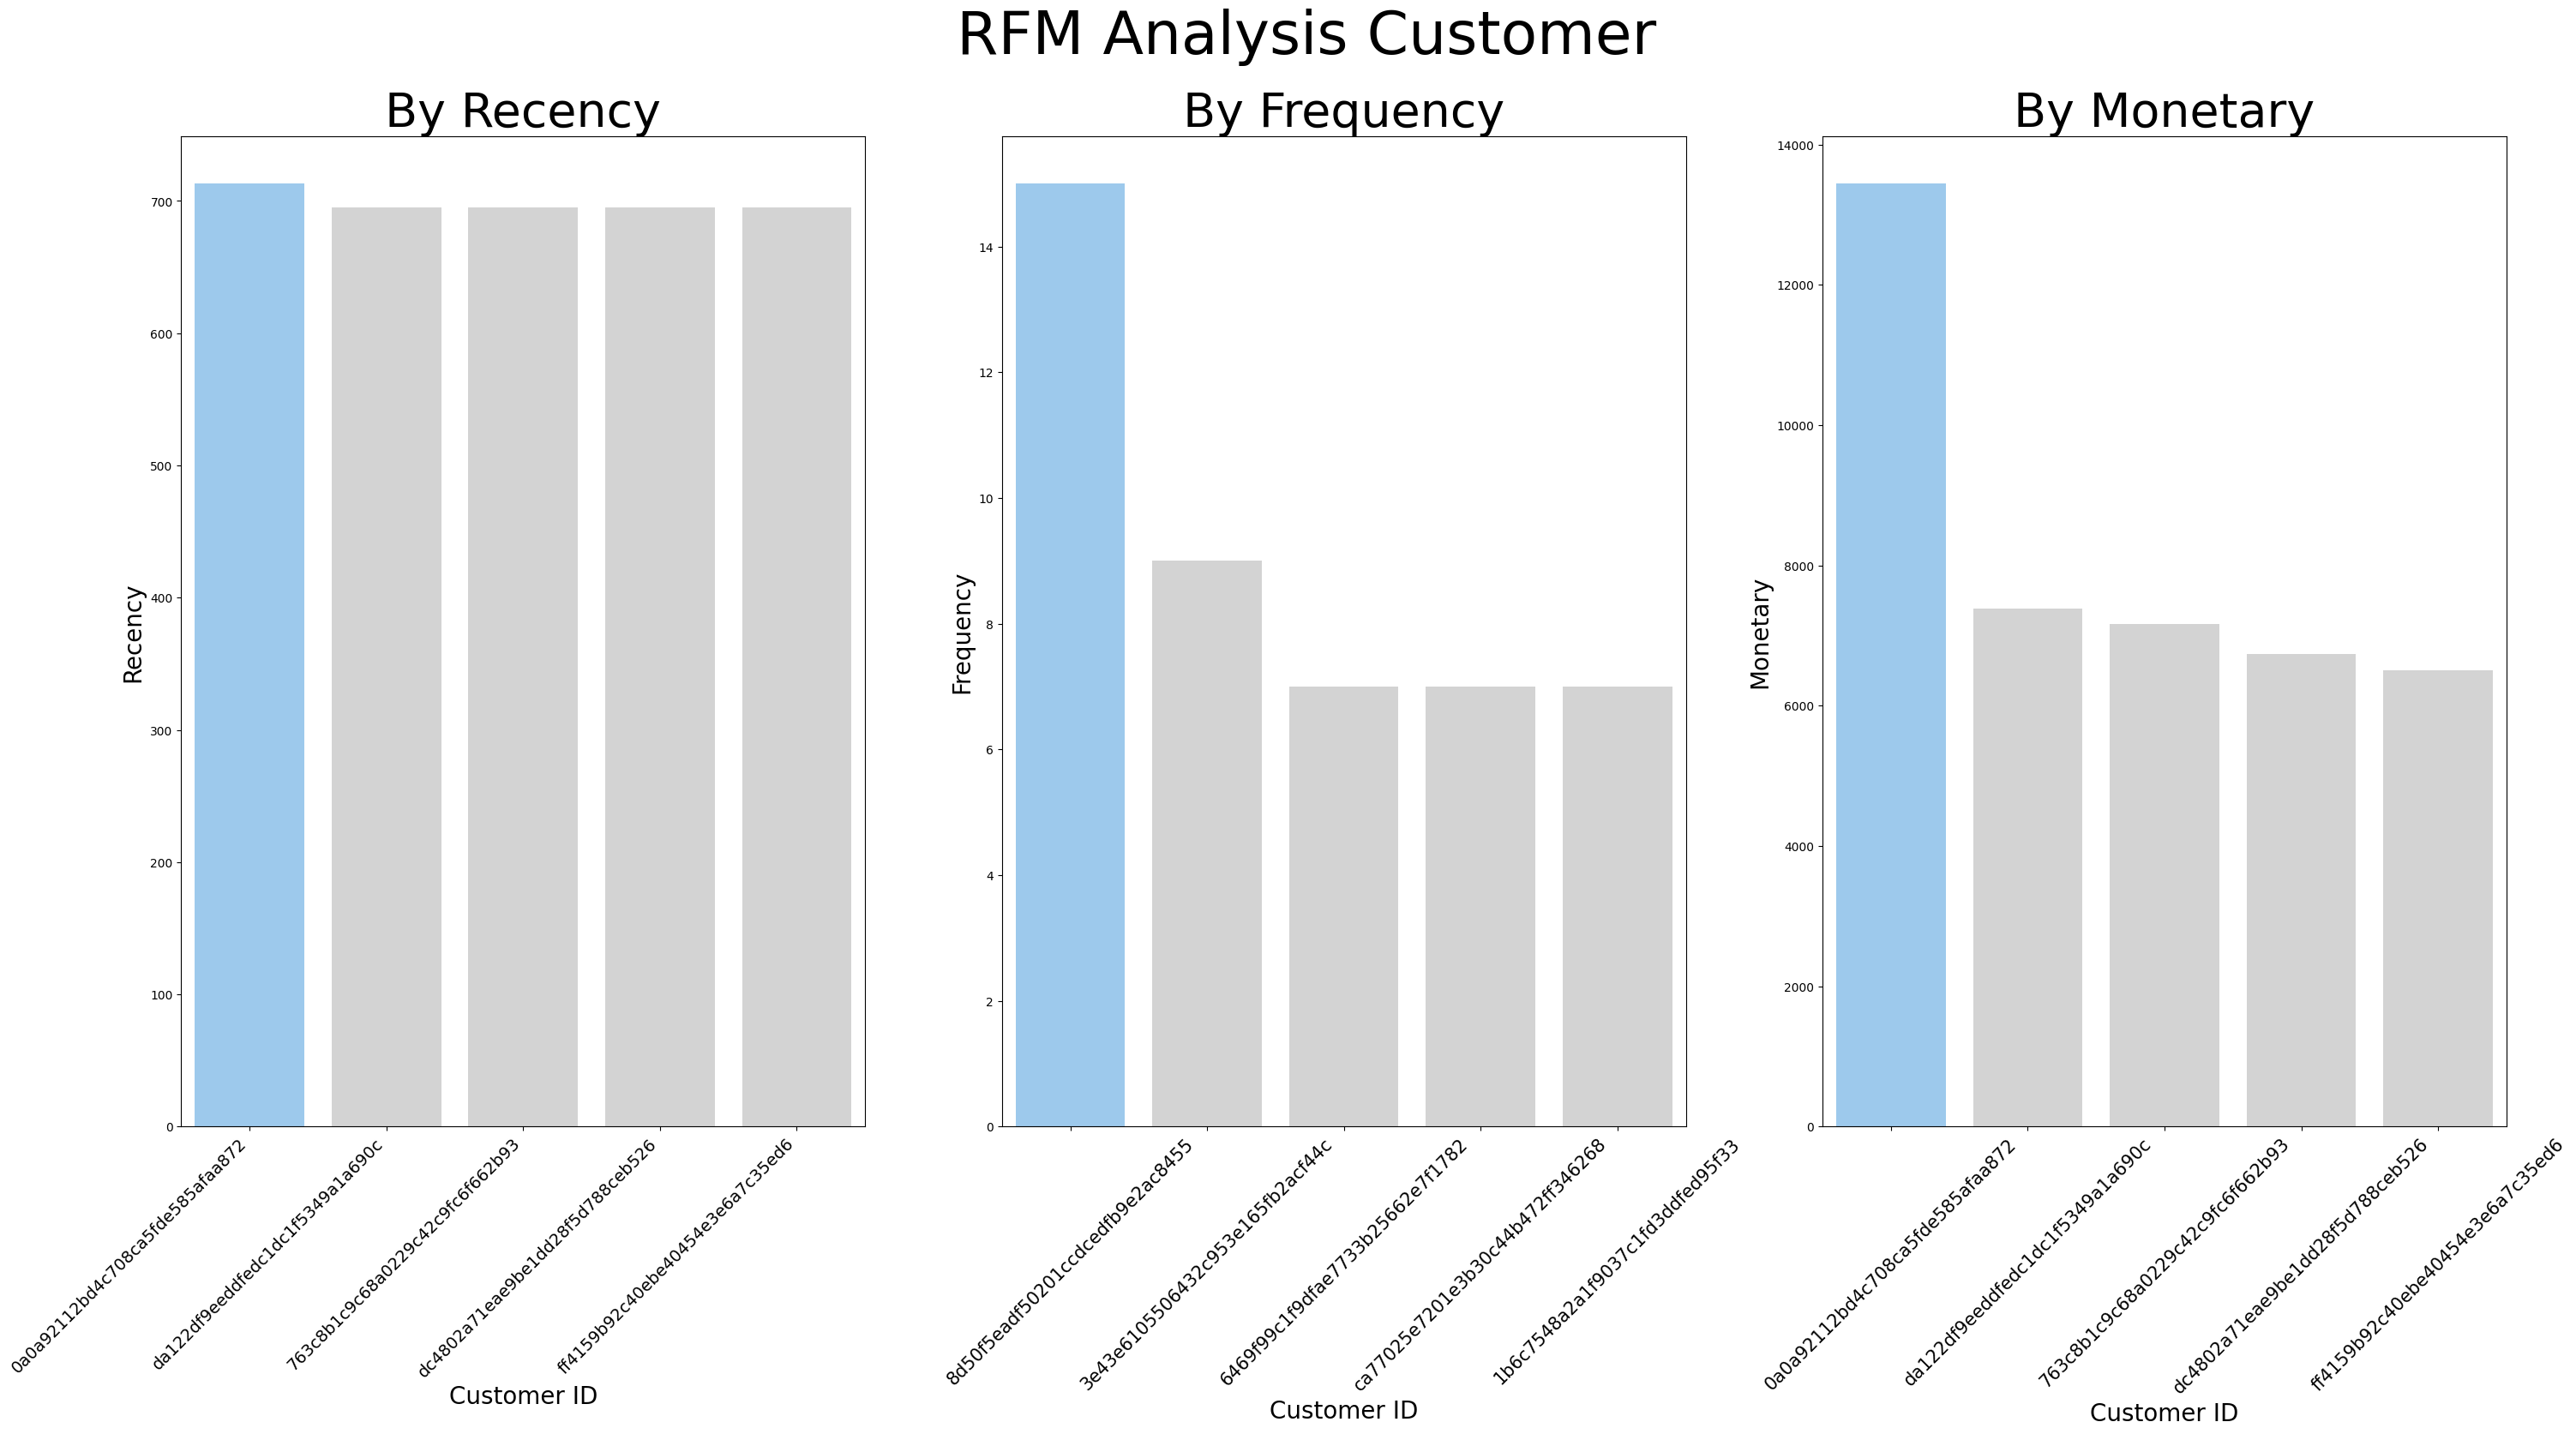

In [64]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(35, 15))
colors = ["#90CAF9", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(y="Recency", x="Customer ID", data=rfm_df.sort_values(by='Recency', ascending=False).head(), ax=ax[0], palette=colors)
ax[0].set_title("By Recency", fontsize=40, loc='center')
ax[0].set_xlabel("Customer ID", fontsize=20)
ax[0].set_ylabel("Recency", fontsize=20)
ax[0].tick_params(axis='x', labelsize=15, rotation=45)
ax[0].set_xticklabels(ax[0].get_xticklabels(), horizontalalignment='right', fontsize=14)

sns.barplot(y="Frequency", x="Customer ID", data=rfm_df.sort_values(by='Frequency', ascending=False).head(), ax=ax[1], palette=colors)
ax[1].set_title("By Frequency", fontsize=40, loc='center')
ax[1].set_xlabel("Customer ID", fontsize=20)
ax[1].set_ylabel("Frequency", fontsize=20)
ax[1].tick_params(axis='x', labelsize=15, rotation=45)
ax[0].set_xticklabels(ax[1].get_xticklabels(), horizontalalignment='right', fontsize=14)

sns.barplot(y="Monetary", x="Customer ID", data=rfm_df.sort_values(by='Monetary', ascending=False).head(), ax=ax[2], palette=colors)
ax[2].set_title("By Monetary", fontsize=40, loc='center')
ax[2].set_xlabel("Customer ID", fontsize=20)
ax[2].set_ylabel("Monetary", fontsize=20)
ax[2].tick_params(axis='x', labelsize=15, rotation=45)
ax[0].set_xticklabels(ax[2].get_xticklabels(), horizontalalignment='right', fontsize=14)

fig.suptitle("RFM Analysis Customer", fontsize=50)
fig.show()


Berdasarkan hasil analisis RFM, Pelanggan dengan Recency paling tinggi adalah dengan Customer ID 0a0a92112bd4c708ca5fde585afaa872, Frequency paling tinggi adalah dengan Customer ID 8d50f5eadf50201ccdcedfb9e2ac8455, dan Monetary paling tinggi adalah dengan Customer ID 0a0a92112bd4c708ca5fde585afaa872.

## Conclusion

- Pertanyaan 1: Bagaimana demografi geolokasi pelanggan e-commerce ini?

> Dari grafik menampilkan 10 negara bagian dengan jumlah pelanggan paling banyak. Pelanggan paling banyak berasal dari negara bagian Sao Paulo, Rio de Janeiro, Minas Gerais, Rio Grande do Sul, dan Parana. Negara bagian dengan jumlah pelanggan paling banyak adalah Sao Paulo dengan jumlah sebesar 46.421. Untuk jumlah pelanggan paling sedikit dari 10 teratas adalah Espirito Santo dengan jumlah 2205.

- Pertanyaan 2: Bagaimana rating rata-rata pelanggan terhadap pelayanan yang disediakan e-commerce dalam rentang bulan tertentu?

> Grafik di atas untuk menampilkan visualisasi untuk rata-rata tiga tahun, yaitu 2016, 2017, dan 2018. Pada tahun 2016 rata-rata tertinggi mencapai rating 5 dengan total transaksi 1 pada bulan Desember, tahun 2017 rata-rata tertinggi pada bulan Agustus sebesar 4.27, dan pada tahun 2018 rata-rata tertinggi mencapai rating 4.27 pada bulan Juli.

- Pertanyaan 3: Pelanggan mana yang merupakan pelanggan terbaik berdasarkan analisis RFM (Recency, Frequency, Monetary)?

> Berdasarkan hasil analisis RFM, Pelanggan dengan Recency paling tinggi adalah dengan Customer ID 0a0a92112bd4c708ca5fde585afaa872, Frequency paling tinggi adalah dengan Customer ID 8d50f5eadf50201ccdcedfb9e2ac8455, dan Monetary paling tinggi adalah dengan Customer ID 0a0a92112bd4c708ca5fde585afaa872.

In [65]:
all_df.to_csv('./dashboard/all_data_dashboard.csv', index=False)